In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers


In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plantdiseases",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE    
)

Found 2152 files belonging to 3 classes.


In [17]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:
len(dataset) # 68 as batch size = 32 * 68 approx 2152

68

In [20]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)  # 32 images each having 256*256 pixel size and RGB of 3
    print(label_batch.numpy()) # 0 1 2 specifies 3 different classes
    print(image_batch[0]) # print image pixel values for 256*256
    print(image_batch[0].numpy()) # same as above but in 3D
    

(32, 256, 256, 3)
[0 1 1 1 0 1 1 2 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0]
tf.Tensor(
[[[192. 191. 199.]
  [195. 194. 202.]
  [198. 197. 205.]
  ...
  [184. 182. 195.]
  [183. 181. 194.]
  [192. 190. 203.]]

 [[192. 191. 199.]
  [193. 192. 200.]
  [195. 194. 202.]
  ...
  [179. 177. 190.]
  [178. 176. 189.]
  [182. 180. 193.]]

 [[198. 197. 205.]
  [196. 195. 203.]
  [197. 196. 204.]
  ...
  [177. 175. 188.]
  [176. 174. 187.]
  [175. 173. 186.]]

 ...

 [[170. 167. 174.]
  [180. 177. 184.]
  [167. 164. 171.]
  ...
  [145. 142. 153.]
  [143. 140. 151.]
  [154. 151. 162.]]

 [[162. 159. 166.]
  [167. 164. 171.]
  [146. 143. 150.]
  ...
  [157. 154. 165.]
  [155. 152. 163.]
  [153. 150. 161.]]

 [[158. 155. 162.]
  [170. 167. 174.]
  [154. 151. 158.]
  ...
  [147. 144. 155.]
  [144. 141. 152.]
  [137. 134. 145.]]], shape=(256, 256, 3), dtype=float32)
[[[192. 191. 199.]
  [195. 194. 202.]
  [198. 197. 205.]
  ...
  [184. 182. 195.]
  [183. 181. 194.]
  [192. 190. 203.]]

 [[192. 

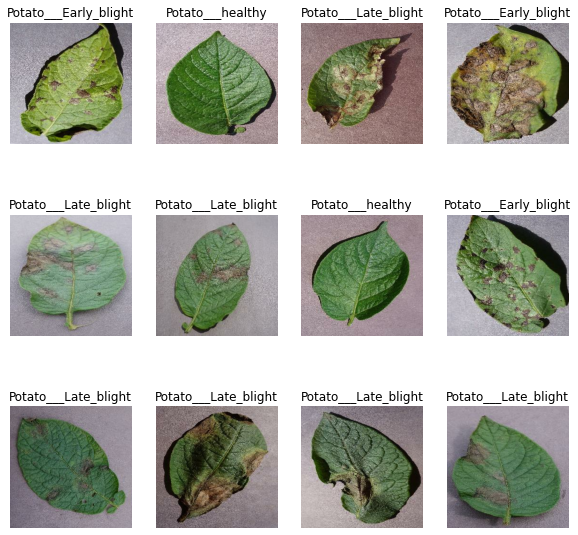

In [23]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

80% ==> training
20% ==> 10% validation, 10% test

In [25]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [27]:
train_ds = dataset.take(54)
len(train_ds)

54

In [28]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [29]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [30]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [32]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1,
                             shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size , seed = 12)
    
    train_size = int(train_split * ds_size )
    val_size   = int(val_split   * ds_size )
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [33]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [36]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [37]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [38]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [39]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)    
])